In [125]:
import pandas as pd

In [126]:
data_path = '/home/sbduser/dataton/candidates_toolkit/data/ml_case_training_data_v2.csv'
customer_df = pd.read_csv(data_path)

In [127]:
data_hist_path = '/home/sbduser/dataton/candidates_toolkit/data/ml_case_training_hist_data.csv'
hist_df = pd.read_csv(data_hist_path)

In [128]:
hist_df.columns

Index(['id', 'price_date', 'price_p1_var', 'price_p2_var', 'price_p3_var',
       'price_p1_fix', 'price_p2_fix', 'price_p3_fix'],
      dtype='object')

In [129]:
hist_mean_df = hist_df.groupby('id')[['price_p1_var', 'price_p2_var', 'price_p3_var']].mean()

In [130]:
hist_mean_df.describe()

,price_p1_var,price_p2_var,price_p3_var
count,16094.000000,16094.000000,16094.000000
mean,0.141004,0.054379,0.030695
std,0.024297,0.049860,0.036220
min,0.000000,0.000000,0.000000
25%,0.123974,0.000000,0.000000
50%,0.147251,0.085946,0.000000
75%,0.150316,0.102396,0.072778
max,0.278759,0.196275,0.102952


In [131]:
hist_mean_df[['price_p1_fix', 'price_p2_fix', 'price_p3_fix']] = hist_df.groupby('id')['price_p1_fix', 'price_p2_fix', 'price_p3_fix'].sum()

In [132]:
hist_mean_df.head()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,488.420789,293.052462,195.368327
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,532.625404,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,543.836520,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,487.769130,292.661462,195.107656
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,531.203164,0.000000,0.000000


In [133]:
customer_df.set_index('id', inplace=True)

In [134]:
customer_df = customer_df.merge(hist_mean_df, how='left', validate='one_to_one', left_index=True, right_index=True)

In [135]:
customer_df.head()

,Unnamed: 0,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,...,pow_max,isic_1l,isic_2l,zip,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,,,,,,,,,,,,,,,,
48ada52261e7cf58715202705a0451c9,0,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,...,180.000,G,47,43877,0.103449,0.092115,0.067241,707.478018,436.282646,100.044610
24011ae4ebbe3035111d65fa7c15bc57,1,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,...,43.648,G,47,31395,0.122856,0.102137,0.072579,447.040256,268.224124,178.816084
23f9e0bddadb1d9c567b3c4576c8ac34,2,NaN,NaN,35446,0,4265,2009-10-26,2016-10-25,NaN,2009-10-26,...,13.200,A,2,31395,0.149953,0.000000,0.000000,535.558725,0.000000,0.000000
0c14a4e90623d74951da665862147606,3,NaN,foosdfpfkusacimwkcsosbicdxkicaua,63442,0,10261,2012-05-15,2016-05-15,2012-05-15,2012-05-15,...,10.390,F,41,31395,0.147365,0.000000,0.000000,532.447626,0.000000,0.000000
f2c6ef2fa0b1a52d02872832279081c0,4,NaN,ewpakwlliwisiwduibdlfmalxowmwpci,11354,0,992,2013-01-01,2017-01-01,NaN,2013-01-01,...,13.200,L,68,31395,0.111658,0.100194,0.075263,707.241330,436.136678,100.011142


In [136]:
customer_df.to_csv('training_customer_merge_hist.csv')

In [137]:
MEAN_GAS_PRICE_PER_KWH = 0.05125
KWH_PER_M3 = 11.70 
MEAN_GAS_PRICE_PER_M3 = MEAN_GAS_PRICE_PER_KWH * KWH_PER_M3

In [138]:
MEAN_GAS_PRICE_PER_M3

0.599625

In [139]:
customer_df['income_due_to_gas_12m'] = customer_df['cons_gas_12m'].multiply(MEAN_GAS_PRICE_PER_M3)

In [140]:
power_columns = ['price_p1_fix', 'price_p2_fix', 'price_p3_fix']

In [141]:
customer_df['income_due_to_fix_12m'] = customer_df[power_columns].sum(axis=1)

In [142]:
variable_columns = ['price_p1_var', 'price_p2_var', 'price_p3_var']

In [143]:
customer_df['price_var_mean'] = customer_df[variable_columns].mean(axis=1)

In [144]:
# customer_df[variable_columns + ['price_var_mean']]

In [145]:
customer_df['income_due_to_var_12m'] = customer_df['price_var_mean'].multiply(customer_df['cons_12m'])

In [146]:
income_vars = ['income_due_to_gas_12m', 'income_due_to_fix_12m', 'income_due_to_var_12m']

In [147]:
customer_df[income_vars].describe()

,income_due_to_gas_12m,income_due_to_fix_12m,income_due_to_var_12m
count,1.608300e+04,16083.000000,1.608100e+04
mean,1.913649e+04,720.085983,1.667431e+04
std,1.065232e+05,244.370069,5.966399e+04
min,-1.821061e+03,0.000000,-1.162071e+04
25%,0.000000e+00,531.914284,3.531941e+02
50%,0.000000e+00,533.336520,1.085725e+03
75%,0.000000e+00,975.409069,4.273010e+03
max,2.511493e+06,1248.382656,1.515242e+06


In [148]:
customer_df['income_12m'] = customer_df[income_vars].sum(axis=1)

In [216]:
customer_df['costs_12m'] = customer_df['income_12m'] - customer_df['net_margin']

In [217]:
descuento = 0.99

In [218]:
customer_df['income_if_disccount'] = customer_df['income_12m'].multiply(descuento)

In [219]:
customer_churn = pd.read_csv('/home/sbduser/dataton/candidates_toolkit/data/ml_case_training_output.csv')

In [220]:
customer_churn.set_index('id', inplace=True)

In [221]:
full_df = customer_df.merge(customer_churn, how='left', left_index=True, right_index=True, validate='one_to_one')

In [222]:
total_revenue_12m = full_df.net_margin.sum()

In [223]:
non_leavers = full_df[full_df['churn'] == 0]
leavers = full_df[full_df['churn'] == 1]

In [224]:
non_leavers.shape

(14495, 48)

In [225]:
leavers.shape

(1588, 48)

In [234]:
import numpy as np

In [250]:
discounts = np.linspace(0.8, 1, 50)

In [251]:
margins = np.zeros((50, ))
for i, disccount in enumerate(discounts):
    leavers['income_if_disccount'] = leavers['income_12m'].multiply(disccount)
    leavers['new_margin'] = leavers['income_if_disccount'] - leavers['costs_12m']
    margins[i] = leavers.new_margin.sum()

/home/sbduser/dataton/venv/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sbduser/dataton/venv/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [287]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')

In [288]:
negative_margins = margins[margins <= 0]
positive_margins = margins[margins > 0]
negative_disccounts = discounts[margins <= 0]
positive_disccounts = discounts[margins > 0]

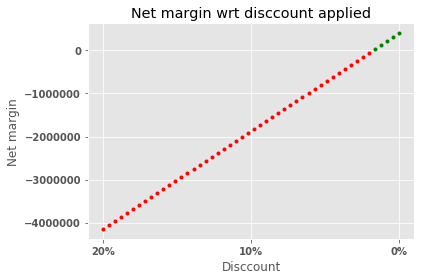

In [290]:
plt.figure()
plt.plot(negative_disccounts, negative_margins, 'r.')
plt.plot(positive_disccounts, positive_margins, 'g.')
plt.title('Net margin wrt disccount applied')
plt.xlabel('Disccount')
plt.xticks([0.8, 0.9, 1])
ax = plt.axes()
ax.set_xticklabels(['20%', '10%', '0%'])
plt.ylabel('Net margin')
plt.tight_layout()
import time
time.sleep(1)
# plt.savefig("margin_vs_disccount.png")